# 1. Export Data

In [119]:
import numpy as np
import pandas as pd
from encodings.aliases import aliases

check for encoding can work with the csv file

In [120]:
alias_values = list(aliases.values())
for encoding in alias_values:
    try:
        pd.read_csv('data.csv', encoding=encoding, nrows=10)
        print(f'successful: {encoding}')
    except:
        pass

successful: ascii
successful: ascii
successful: ascii
successful: ascii
successful: ascii
successful: ascii
successful: ascii
successful: ascii
successful: ascii
successful: ascii
successful: ascii
successful: ascii
successful: big5
successful: big5
successful: big5hkscs
successful: big5hkscs
successful: cp037
successful: cp037
successful: cp037
successful: cp037
successful: cp037
successful: cp037
successful: cp037
successful: cp037
successful: cp1026
successful: cp1026
successful: cp1026
successful: cp1125
successful: cp1125
successful: cp1125
successful: cp1125
successful: cp1140
successful: cp1140
successful: cp1250
successful: cp1250
successful: cp1251
successful: cp1251
successful: cp1252
successful: cp1252
successful: cp1253
successful: cp1253
successful: cp1254
successful: cp1254
successful: cp1255
successful: cp1255
successful: cp1256
successful: cp1256
successful: cp1257
successful: cp1257
successful: cp1258
successful: cp1258
successful: cp273
successful: cp273
successful: c

In [148]:
df_initial = pd.read_csv('data.csv', encoding='iso8859-10')
df_initial.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

every record on the dataset represents an individual kind of item(stockcode = one product) purchased within an invoice, including following basic information: 
1. InvoiceNo: invoice number; 6-digit integer, cancellation if starts with 'c'; unique;  nominal
2. StockCode: each distinct item; 5-digit integer, followed by a letter optionally; unique; nominal
3. Description: product description; nominal 
4. Quantity: quantities of each product per transaction; numeric
5. InvoiceDate: invoice date and time; datetime
6. UnitPrice: product price per unit; numeric
7. CustomerID : customer number; 5-digit integer; unique; nominal
8. Country: the country where purchasing happen; nominal

In [122]:
df_initial.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [123]:
df_initial.shape

(541909, 8)

convert to proper data type

In [124]:
df_initial.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [149]:
dtype_mapping = {
    'InvoiceNo': 'string',          
    'StockCode': 'string',         
    'Description': 'string', 
    'Quantity': 'Int64',         
    'InvoiceDate': 'datetime64[ns]',
    'UnitPrice': 'float64',
    'CustomerID': 'float64',
    'Country': 'string'    
}
df_initial = df_initial.astype(dtype_mapping)
df_initial['CustomerID'] = df_initial['CustomerID'].astype('Int64').astype('string')
df_initial.dtypes

InvoiceNo      string[python]
StockCode      string[python]
Description    string[python]
Quantity                Int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country        string[python]
dtype: object

quantity and unitprice have negative value

In [126]:
df_initial.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.0,541909,541909.000000
mean,9.55225,2011-07-04 13:34:57.156386048,4.611114
min,-80995.0,2010-12-01 08:26:00,-11062.060000
25%,1.0,2011-03-28 11:34:00,1.250000
50%,3.0,2011-07-19 17:17:00,2.080000
75%,10.0,2011-10-19 11:27:00,4.130000
max,80995.0,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


null value

In [127]:
df_initial.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [128]:
df_initial.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

missing description imputation by StockCode

In [150]:
# Step 1: Create a dictionary mapping StockCode to its most common Description
description_map = df_initial.dropna(subset=['Description']).groupby('StockCode')['Description'].agg(pd.Series.mode).to_dict()

# Step 2: Define a function to impute the description
def impute_description(row):
    if pd.isna(row['Description']):
        # Try to get the description from the map. If not found, return 'Unknown'
        return description_map.get(row['StockCode'], 'Unknown')
    else:
        return row['Description']

# Step 3: Apply the function to your DataFrame
df_initial['Description'] = df_initial.apply(impute_description, axis=1)

For missing CustomerID, I should test the missing value reason: MCAR, MAR, MNAR

In [130]:
# 1. Create a new Boolean flag column to mark rows where CustomerID was originally missing
df_initial['CustomerID_IsNA'] = df_initial['CustomerID'].isna().astype('int')

# 2. Fill the NA values in the original column with a placeholder label 'Unknown'
# df_initial['CustomerID'] = df_initial['CustomerID'].fillna('Unknown')

In [131]:
col_list = df_initial.columns.to_list()
col_list.pop(2)

'Description'

leveraging the chi-sqaure independence test and Cramér's V to evaluate whether missing CustomerID is independent or dependence on observed variable (MAR)

In [132]:
import numpy as np
from scipy.stats import chi2_contingency

for i in range(len(col_list)):
    # 1. Create your contingency table
    contingency_table = pd.crosstab(df_initial[col_list[i]], df_initial['CustomerID_IsNA'])

    # 2. Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # 3. Calculate Cramér's V
    n = contingency_table.sum().sum() # Total number of observations
    phi2 = chi2 / n
    r, k = contingency_table.shape # Number of rows and columns
    cramers_v = np.sqrt(phi2 / min(k-1, r-1))

    print(f'{col_list[i]}:')
    print(f"Chi2 p-value: {p}") # This will be 0.0
    print(f"Cramér's V: {cramers_v:.4f}") # This is what matters now
    print()

InvoiceNo:
Chi2 p-value: 0.0
Cramér's V: 1.0000

StockCode:
Chi2 p-value: 0.0
Cramér's V: 0.3828

Quantity:
Chi2 p-value: 0.0
Cramér's V: 0.4547

InvoiceDate:
Chi2 p-value: 0.0
Cramér's V: 0.9947

UnitPrice:
Chi2 p-value: 0.0
Cramér's V: 0.8764

CustomerID:
Chi2 p-value: 1.0
Cramér's V: nan

Country:
Chi2 p-value: 0.0
Cramér's V: 0.1665

CustomerID_IsNA:
Chi2 p-value: 0.0
Cramér's V: 1.0000



/var/folders/g9/jny74knx5dvc_4cy4vdvxl_80000gn/T/ipykernel_4911/1828083217.py:15: RuntimeWarning: invalid value encountered in scalar divide
  cramers_v = np.sqrt(phi2 / min(k-1, r-1))


The feature_importances_ attribute of Random Forest classifier provides a measure of the relative importance of each feature in predicting the target variable (Missing CustomerID), So it also indicates whether the missing CustomerID is independent.

In [ ]:
# --- 1. Import Libraries ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# --- 2. Create Basic Features ---
df_initial['TotalValue'] = df_initial['Quantity'] * df_initial['UnitPrice']
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate'])
df_initial['Invoice_DayOfWeek'] = df_initial['InvoiceDate'].dt.dayofweek
df_initial['Invoice_Hour'] = df_initial['InvoiceDate'].dt.hour

# Ensure the target flag exists
if 'CustomerID_IsNA' not in df_initial.columns:
    df_initial['CustomerID_IsNA'] = df_initial['CustomerID'].isna().astype(int)

# --- 3. Feature Engineering ---
# One-Hot Encode 'Country'
country_dummies = pd.get_dummies(df_initial['Country'], prefix='Ctry').astype(int)
df_initial = pd.concat([df_initial, country_dummies], axis=1)

# Frequency Encode 'StockCode' (to avoid thousands of dummy columns)
stockcode_freq = df_initial['StockCode'].value_counts().to_dict()
df_initial['StockCode_Freq'] = df_initial['StockCode'].map(stockcode_freq)

# --- 4. Create Feature Matrix (X) and Target (y) ---
feature_columns = [
    'Quantity',
    'UnitPrice',
    'TotalValue',
    'Invoice_DayOfWeek',
    'Invoice_Hour',
    'StockCode_Freq'
]
# Add all one-hot encoded country columns
feature_columns.extend(country_dummies.columns.tolist())

X = pd.concat([df_initial[feature_columns], country_dummies], axis=1)
X = X.fillna(0)
y = df_initial['CustomerID_IsNA']

# --- 5. Train the Random Forest Model ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               class_weight='balanced',
                               n_jobs=-1)
model.fit(X_train, y_train)

# --- 6. Evaluate Model ---
y_pred = model.predict(X_test)
print("=== Model Performance ===")
print(classification_report(y_test, y_pred))

# --- 7. Analyze Feature Importance ---
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Top Features Predicting Missing CustomerID ===")
print(feature_importance_df.head(10))

# --- 8. Add Predictions to DataFrame ---
df_initial['ML_MissingProbability'] = model.predict_proba(X)[:, 1]

=== Model Performance ===
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     81366
           1       0.93      0.90      0.92     27016

    accuracy                           0.96    108382
   macro avg       0.95      0.94      0.94    108382
weighted avg       0.96      0.96      0.96    108382


=== Top Features Predicting Missing CustomerID ===
                feature  importance
1             UnitPrice    0.251621
2            TotalValue    0.203721
0              Quantity    0.144559
4          Invoice_Hour    0.142439
5        StockCode_Freq    0.131230
3     Invoice_DayOfWeek    0.088553
80  Ctry_United Kingdom    0.010798
42  Ctry_United Kingdom    0.009908
58         Ctry_Germany    0.002066
20         Ctry_Germany    0.001862


After we evaulate reasons of missing, I can't ensure the missing is compelety independent(MCAR), and most of measures support it is missing because of MAR, so we can't use general deletion or imputation. I decide to separate entire dataset into two subsets to do K-means clustering. The one have customerID, the other one is anonymous dataset without customerID.

drop the missing value and analyze the one have CustomerID.

In [154]:
df_initial.dropna(axis=0, subset=['CustomerID'], inplace=True)

In [155]:
df_initial.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [156]:
df_initial.shape

(406829, 8)

duplicated rows

In [157]:
df_initial.duplicated().sum()

5225

In [160]:
df_initial.drop_duplicates(inplace=True)
df_initial.duplicated().sum()

0

remove `leading and trailing whitespace` of Description

In [161]:
df_initial['Description'] = df_initial['Description'].str.strip()

# 2. EDA

In [ ]:
df_initial.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df_initial.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


order count rank of countries, the UK dominated order volume, accounting for nearly 90 percent

In [ ]:
# df_initial.drop_duplicates(subset=['InvoiceNo', 'CustomerID'])['Country'].value_counts()
order_count = df_initial.groupby('Country')['InvoiceNo'].apply(lambda x: x.nunique()).sort_values(ascending=False).rename('order_count')
order_count

Country
United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Malta                      10
Singapore                  10
Unspecified                 8
Iceland                     7
USA                         7
Israel                      6
Greece                      6
Canada                      6
Czech Republic              5
European Community          5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Ba

In [ ]:
order_count/order_count.sum() * 100

Country
United Kingdom          89.486255
Germany                  2.717440
France                   2.063993
EIRE                     1.437584
Belgium                  0.536278
Spain                    0.473186
Netherlands              0.455160
Switzerland              0.319964
Portugal                 0.315457
Australia                0.310951
Italy                    0.247859
Finland                  0.216314
Sweden                   0.207301
Norway                   0.180261
Channel Islands          0.148716
Japan                    0.126183
Poland                   0.108157
Denmark                  0.094637
Cyprus                   0.090131
Austria                  0.085624
Malta                    0.045065
Singapore                0.045065
Unspecified              0.036052
Iceland                  0.031546
USA                      0.031546
Israel                   0.027039
Greece                   0.027039
Canada                   0.027039
Czech Republic           0.022533
Europe

datasets include `22190` orders made by `4372` customers involved `3684` unique products

In [ ]:
pd.DataFrame({'order': df_initial['InvoiceNo'].nunique(),
              'product': df_initial['StockCode'].nunique(),
              'customer': df_initial['CustomerID'].nunique()},
              index=['count']).T

,count
order,22190
product,3684
customer,4372


the range of products number in the same order is from `1` to `542` and there are InvoiceNo start with C(cancellation) 

In [ ]:
temp = df_initial.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['StockCode'].count().rename(columns={'StockCode': 'number of products'})
temp.head(10)

,CustomerID,InvoiceNo,number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


In [ ]:
temp.describe()

,number of products
count,22190.000000
mean,18.098423
std,23.363888
min,1.000000
25%,3.000000
50%,12.000000
75%,24.000000
max,542.000000


the percentage of number of cancellation reach `16.5%`

In [ ]:
temp['InvoiceNo'].str.match(r'^C').sum()/len(temp) * 100

16.466876971608833

Since there is no one field show return quantity, so I want to <b>create one column to show return quantity</b>
because InvoiceNo start with 'C' and negative quantity represents return, I assume there are corresponding record meet:
1. identical StockCode, Description
2. opposite quantity

create a return data to test with the entire dataset

In [163]:
df_return = df_initial[df_initial['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
df_return['Quantity'] = -df_return['Quantity']
df_return.head(10)

,CustomerID,Quantity,StockCode,Description,UnitPrice
141,14527,1,D,Discount,27.50
154,15311,1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
235,17548,12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
236,17548,24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
237,17548,24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29
238,17548,24,21980,PACK OF 12 RED RETROSPOT TISSUES,0.29
239,17548,12,21484,CHICK GREY HOT WATER BOTTLE,3.45
240,17548,12,22557,PLASTERS IN TIN VINTAGE PAISLEY,1.65
241,17548,24,22553,PLASTERS IN TIN SKULLS,1.65
939,17897,6,22960,JAM MAKING SET WITH JARS,4.25


In [164]:
df_initial.merge(right=df_return, how='inner', on=['CustomerID', 'StockCode', 'Description', 'Quantity'], suffixes=['_full', '_return'])[['InvoiceNo', 'StockCode', 'Description', 'Quantity']].sort_values('InvoiceNo')
   

,InvoiceNo,StockCode,Description,Quantity
0,536373,21071,VINTAGE BILLBOARD DRINK ME MUG,6
1,536373,82483,WOOD 2 DRAWER CABINET WHITE FINISH,2
2,536375,21071,VINTAGE BILLBOARD DRINK ME MUG,6
3,536375,82483,WOOD 2 DRAWER CABINET WHITE FINISH,2
4,536381,22778,GLASS CLOCHE SMALL,3
...,...,...,...,...
5857,581571,21313,GLASS HEART T-LIGHT HOLDER,1
5856,581571,21313,GLASS HEART T-LIGHT HOLDER,1
5858,581571,21313,GLASS HEART T-LIGHT HOLDER,1
5859,581579,22083,PAPER CHAIN KIT RETROSPOT,6


check whether the return assumption is true. it is failed at the first try since the `Discount` items.

In [79]:
num = 1
for index, col in  df_return.iterrows():
    if df_initial[(df_initial['Description'] == col['Description'][1:]) & (df_initial['Quantity'] == -col['Quantity']) 
                & (df_initial['StockCode'] == col['StockCode']) & (df_initial['CustomerID'] == col['CustomerID'])].shape[0] == 0:
        print(f'{num}th: ') 
        print(df_return.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break
    num+=1

1th: 
CustomerID        14527
Quantity              1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


So I filter out records with `Discount` Description

In [80]:
df_return = df_initial[(df_initial['Quantity'] < 0) & (df_initial['Description'] != 'Discount')][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
df_return.head(10)

,CustomerID,Quantity,StockCode,Description,UnitPrice
154,15311,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
235,17548,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
236,17548,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
237,17548,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29
238,17548,-24,21980,PACK OF 12 RED RETROSPOT TISSUES,0.29
239,17548,-12,21484,CHICK GREY HOT WATER BOTTLE,3.45
240,17548,-12,22557,PLASTERS IN TIN VINTAGE PAISLEY,1.65
241,17548,-24,22553,PLASTERS IN TIN SKULLS,1.65
939,17897,-6,22960,JAM MAKING SET WITH JARS,4.25
1441,17841,-1,22632,HAND WARMER RED RETROSPOT,2.10


there are return record don't satisfy my assumption again, I guess the reason is purchase made earlier than the earliest date in this dataset 

In [81]:
num = 1
for index, col in  df_return.iterrows():
    if df_initial[(df_initial['Description'] == col['Description']) & (df_initial['Quantity'] >= -col['Quantity']) 
                & (df_initial['StockCode'] == col['StockCode']) & (df_initial['CustomerID'] == col['CustomerID'])].shape[0] == 0:
        print(f'{num}th: ') 
        print(df_return.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break
    num+=1

2th: 
CustomerID                             17548
Quantity                                 -12
StockCode                              22556
Description    PLASTERS IN TIN CIRCUS PARADE
UnitPrice                               1.65
Name: 235, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [82]:
df_initial[(df_initial.CustomerID == '17548') & (df_initial.Description == 'PLASTERS IN TIN CIRCUS PARADE')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom


In [83]:
# separate the normal and return order
df_pos = df_initial[df_initial['Quantity'] > 0].copy()
df_neg = df_initial[df_initial['Quantity'] < 0].copy()


# merge two datasets with identical customerid, stockcode and description
merged = pd.merge(
    df_pos.reset_index(),
    df_neg.reset_index(),
    on=['CustomerID', 'StockCode', 'Description'],
    suffixes=('_order', '_return')
)
merged[['index_order', 'index_return', 'CustomerID', 'Description', 'Quantity_order', 'Quantity_return']].sort_values('index_order')

,index_order,index_return,CustomerID,Description,Quantity_order,Quantity_return
0,6,86893,17850,GLASS STAR FROSTED T-LIGHT HOLDER,6,-1
1,6,86894,17850,GLASS STAR FROSTED T-LIGHT HOLDER,6,-1
2,14,140191,13047,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,-1
3,45,90262,12583,POSTAGE,3,-1
4,54,86891,17850,SAVE THE PLANET MUG,6,-1
...,...,...,...,...,...,...
23316,541833,320552,17581,JUMBO BAG VINTAGE CHRISTMAS,30,-20
23317,541871,357535,15804,VICTORIAN GLASS HANGING T-LIGHT,12,-12
23318,541876,492369,15804,MULTI COLOUR SILVER T-LIGHT HOLDER,24,-2
23319,541890,82286,13113,LARGE CAKE STAND HANGING STRAWBERY,8,-1


In [84]:
merged

,index_order,InvoiceNo_order,StockCode,Description,Quantity_order,InvoiceDate_order,UnitPrice_order,CustomerID,Country_order,index_return,InvoiceNo_return,Quantity_return,InvoiceDate_return,UnitPrice_return,Country_return
0,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,86893,C543611,-1,2011-02-10 14:38:00,4.25,United Kingdom
1,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,86894,C543611,-1,2011-02-10 14:38:00,4.95,United Kingdom
2,14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,140191,C548374,-1,2011-03-30 16:36:00,4.25,United Kingdom
3,45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,90262,C543992,-1,2011-02-15 10:29:00,18.00,France
4,54,536373,21871,SAVE THE PLANET MUG,6,2010-12-01 09:02:00,1.06,17850,United Kingdom,86891,C543611,-1,2011-02-10 14:38:00,1.06,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23316,541833,581579,23343,JUMBO BAG VINTAGE CHRISTMAS,30,2011-12-09 12:19:00,1.79,17581,United Kingdom,320552,C564998,-20,2011-08-31 16:14:00,2.08,United Kingdom
23317,541871,581585,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,357535,C568097,-12,2011-09-23 15:12:00,1.95,United Kingdom
23318,541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,2011-12-09 12:31:00,0.85,15804,United Kingdom,492369,C578110,-2,2011-11-23 09:23:00,0.85,United Kingdom
23319,541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,82286,C543195,-1,2011-02-04 12:29:00,8.50,United Kingdom


In [85]:
# filter in valid record, meet:
# 1. return date later than purchase date 
# 2. purchase quantity must greater than or equal to return one
valid_matches = merged[(merged['InvoiceDate_return'] > merged['InvoiceDate_order']) \
                       & (-merged['Quantity_return'] < merged['Quantity_order'])].copy()

# a return order can be anchored by customerid, stockcode, description and return invoice date,
# one return order corresponding several normal order, I choose the latest normal order to match this return order.
valid_matches.sort_values('InvoiceDate_order', ascending=False, inplace=True)
grouped = valid_matches.groupby(['CustomerID', 'StockCode', 'Description', 'InvoiceDate_return'])
valid_matches = grouped.first().reset_index()
valid_matches

,CustomerID,StockCode,Description,InvoiceDate_return,index_order,InvoiceNo_order,Quantity_order,InvoiceDate_order,UnitPrice_order,Country_order,index_return,InvoiceNo_return,Quantity_return,UnitPrice_return,Country_return
0,12359,22666,RECIPE BOX PANTRY YELLOW DESIGN,2011-04-13 13:38:00,84170,543370,6,2011-02-07 14:51:00,2.95,Cyprus,154937,C549955,-2,2.95,Cyprus
1,12359,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2011-12-02 11:21:00,395382,571034,3,2011-10-13 12:47:00,4.95,Cyprus,519799,C580165,-1,4.95,Cyprus
2,12359,22797,CHEST OF DRAWERS GINGHAM HEART,2011-12-02 11:21:00,395395,571034,4,2011-10-13 12:47:00,16.95,Cyprus,519796,C580165,-2,16.95,Cyprus
3,12359,22826,LOVE SEAT ANTIQUE WHITE METAL,2011-12-02 11:21:00,395379,571034,2,2011-10-13 12:47:00,85.00,Cyprus,519798,C580165,-1,42.50,Cyprus
4,12359,23245,SET OF 3 REGENCY CAKE TINS,2011-12-02 11:21:00,395371,571034,4,2011-10-13 12:47:00,4.95,Cyprus,519797,C580165,-2,4.95,Cyprus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,18272,22969,HOMEMADE JAM SCENTED CANDLES,2011-05-11 09:49:00,171967,551507,12,2011-04-28 18:11:00,1.45,United Kingdom,184926,C552720,-2,1.45,United Kingdom
5028,18272,84817,DANISH ROSE DECORATIVE PLATE,2011-05-11 09:49:00,171960,551507,6,2011-04-28 18:11:00,2.10,United Kingdom,184924,C552720,-2,2.10,United Kingdom
5029,18276,23401,RUSTIC MIRROR WITH LACE HEART,2011-11-18 16:54:00,421490,572990,2,2011-10-27 10:54:00,6.25,United Kingdom,481908,C577386,-1,6.25,United Kingdom
5030,18276,23401,RUSTIC MIRROR WITH LACE HEART,2011-11-18 17:01:00,421490,572990,2,2011-10-27 10:54:00,6.25,United Kingdom,481921,C577390,-1,6.25,United Kingdom


In [86]:
# add new column QuantityCanceled
df_cleaned = df_initial.copy()
df_cleaned['QuantityCanceled'] = 0
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


In [87]:
# filter out the order corresponding several return order
true_indexes = valid_matches.groupby('index_order').size() > 1
true_indexes = true_indexes[true_indexes].index.tolist()

result = valid_matches[valid_matches['index_order'].isin(true_indexes)]
result.sort_values('index_order')

,CustomerID,StockCode,Description,InvoiceDate_return,index_order,InvoiceNo_order,Quantity_order,InvoiceDate_order,UnitPrice_order,Country_order,index_return,InvoiceNo_return,Quantity_return,UnitPrice_return,Country_return
4473,17511,22198,LARGE POPCORN HOLDER,2010-12-07 12:45:00,222,536390,50,2010-12-01 10:19:00,1.45,United Kingdom,14537,C537602,-1,1.45,United Kingdom
4474,17511,22198,LARGE POPCORN HOLDER,2011-01-05 16:02:00,222,536390,50,2010-12-01 10:19:00,1.45,United Kingdom,45146,C540250,-2,1.45,United Kingdom
1802,14047,84792,ENCHANTED BIRD COATHANGER 5 HOOK,2010-12-09 15:01:00,3267,536615,8,2010-12-02 10:09:00,4.65,United Kingdom,21628,C538102,-2,4.65,United Kingdom
1803,14047,84792,ENCHANTED BIRD COATHANGER 5 HOOK,2011-01-07 09:21:00,3267,536615,8,2010-12-02 10:09:00,4.65,United Kingdom,47240,C540398,-2,4.65,United Kingdom
3631,16161,22470,HEART OF WICKER LARGE,2011-02-10 17:44:00,10828,537238,3,2010-12-06 10:03:00,2.95,United Kingdom,87213,C543643,-2,2.95,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,14217,23460,SWEETHEART WALL TIDY,2011-11-30 15:14:00,506034,579123,2,2011-11-28 12:08:00,9.95,United Kingdom,515690,C579778,-1,9.95,United Kingdom
298,12479,20979,36 PENCILS TUBE RED RETROSPOT,2011-12-05 16:39:00,506730,579152,16,2011-11-28 13:26:00,1.25,Germany,527382,C580714,-4,1.25,Germany
299,12479,20979,36 PENCILS TUBE RED RETROSPOT,2011-12-06 09:25:00,506730,579152,16,2011-11-28 13:26:00,1.25,Germany,529659,C580740,-12,1.25,Germany
3260,15621,71477,COLOURED GLASS STAR T-LIGHT HOLDER,2011-12-05 12:52:00,507389,579183,48,2011-11-28 15:16:00,3.29,United Kingdom,525953,C580641,-14,3.95,United Kingdom


In [88]:
# aggregate return orders corresponding one order
temp = -result.groupby('index_order')['Quantity_return'].sum()
temp2 = valid_matches.merge(temp, on='index_order', how='left')
valid_matches = temp2.groupby('index_order').first()

valid_matches['Quantity_return_y'] = np.where(
    valid_matches['Quantity_return_y'].isna(),  
    -valid_matches['Quantity_return_x'],      
    valid_matches['Quantity_return_y']      
)
valid_matches.reset_index(inplace=True)
valid_matches['Quantity_return_y'] = valid_matches['Quantity_return_y'].astype('int64')

valid_matches.head(20)

,index_order,CustomerID,StockCode,Description,InvoiceDate_return,InvoiceNo_order,Quantity_order,InvoiceDate_order,UnitPrice_order,Country_order,index_return,InvoiceNo_return,Quantity_return_x,UnitPrice_return,Country_return,Quantity_return_y
0,65,15100,21258,VICTORIAN SEWING BOX LARGE,2010-12-07 16:21:00,536374,32,2010-12-01 09:09:00,10.95,United Kingdom,16424,C537656,-12,10.95,United Kingdom,12
1,96,14688,21212,PACK OF 72 RETROSPOT CAKE CASES,2011-01-31 10:43:00,536378,120,2010-12-01 09:37:00,0.42,United Kingdom,76676,C542635,-2,0.42,United Kingdom,2
2,98,14688,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2011-01-31 10:43:00,536378,24,2010-12-01 09:37:00,0.55,United Kingdom,76675,C542635,-1,0.55,United Kingdom,1
3,134,15311,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,2010-12-13 15:05:00,536381,4,2010-12-01 09:41:00,1.45,United Kingdom,28607,C538650,-1,1.25,United Kingdom,1
4,139,15311,22719,GUMBALL MONOCHROME COAT RACK,2010-12-08 13:18:00,536381,36,2010-12-01 09:41:00,1.06,United Kingdom,18199,C537805,-3,1.06,United Kingdom,3
5,211,17511,22941,CHRISTMAS LIGHTS 10 REINDEER,2011-01-05 16:02:00,536390,2,2010-12-01 10:19:00,8.50,United Kingdom,45148,C540250,-1,8.50,United Kingdom,1
6,212,17511,22960,JAM MAKING SET WITH JARS,2011-03-17 13:55:00,536390,12,2010-12-01 10:19:00,3.75,United Kingdom,122200,C546854,-1,3.75,United Kingdom,1
7,221,17511,22197,SMALL POPCORN HOLDER,2010-12-07 12:45:00,536390,100,2010-12-01 10:19:00,0.72,United Kingdom,14531,C537602,-1,0.72,United Kingdom,1
8,222,17511,22198,LARGE POPCORN HOLDER,2010-12-07 12:45:00,536390,50,2010-12-01 10:19:00,1.45,United Kingdom,14537,C537602,-1,1.45,United Kingdom,3
9,228,17511,22654,DELUXE SEWING KIT,2010-12-07 12:45:00,536390,40,2010-12-01 10:19:00,4.95,United Kingdom,14528,C537602,-1,4.95,United Kingdom,1


In [89]:
index = valid_matches['index_order'].unique()
index.sort()

In [90]:
df_cleaned.loc[index, 'QuantityCanceled']

65        0
96        0
98        0
134       0
139       0
         ..
531887    0
531893    0
533098    0
533099    0
533717    0
Name: QuantityCanceled, Length: 4789, dtype: int64

In [91]:
# assign valid return quantity to quantitycanceled column
temp = valid_matches[['index_order', 'Quantity_return_y']].set_index('index_order')

index = valid_matches['index_order'].unique()
index.sort()
df_cleaned.loc[index, 'QuantityCanceled'] = temp.values

# drop the return record 
df_cleaned.drop(valid_matches.index_return, inplace=True)

In [92]:
# find the return record is both not discount and without corresponding order and drop them
def_neg=df_neg[df_neg.StockCode != 'D']
doubtful_list = def_neg[~def_neg.index.isin(valid_matches['index_return'])].index.to_list()
doubtful_list[:10]

df_cleaned.drop(doubtful_list, inplace=True)

In [93]:
# find the return quantity > order quantity
mask = (df_cleaned['QuantityCanceled'] > 0 ) & (df_cleaned['QuantityCanceled'] > df_cleaned['Quantity'])
mask.sum()

13

In [94]:
# change the return quantity equal to order quantity
target_indices = df_cleaned[mask].index
df_cleaned.loc[target_indices, 'QuantityCanceled'] = df_cleaned.loc[target_indices, 'Quantity']

In [95]:
# drop the discount record
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['StockCode'] == 'D'].index).reset_index(drop=True)

In [96]:
# create new column totalprice
df_cleaned['Totalprice'] = (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled']) * df_cleaned['UnitPrice']
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,Totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
...,...,...,...,...,...,...,...,...,...,...
392727,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0,10.2
392728,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0,12.6
392729,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0,16.6
392730,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0,16.6


# 3.Data preprocessing

In [97]:
# aggregate several record to one by identical customerid and invoice number, datetime aggregated by the mean of the start and end record date
temp = df_cleaned.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['Totalprice'].sum()
basket_price = temp.rename(columns={'Totalprice': 'Basket_price'})
basket_price.head()

df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')

temp = df_cleaned.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
basket_price['InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basket_price


,CustomerID,InvoiceNo,Basket_price,InvoiceDate
0,12346,541431,77183.6,2011-01-18 10:01:00.000000000
1,12347,537626,711.79,2010-12-07 14:57:00.000000000
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:43:00.000000000
4,12347,556201,382.52,2011-06-09 13:01:00.000000000
...,...,...,...,...
18531,18283,579673,220.31,2011-11-30 12:59:00.000000000
18532,18283,580872,208.0,2011-12-06 12:02:00.000000000
18533,18287,554065,765.28,2011-05-22 10:39:00.000000000
18534,18287,570715,1001.32,2011-10-12 10:23:00.000000000


separate total amount to several bins, range from `200 to 500 accounting for the largest share`, while extremely high-value transactions`(100k-200k)` are exceptionally rare(just one case).

In [98]:
bins = np.array([0, 50, 100, 200, 500, 1000, 5000, 100000, 200000])
counts = pd.cut(basket_price['Basket_price'], bins, right=False).value_counts().sort_index()
counts

Basket_price
[0, 50)             1157
[50, 100)           1069
[100, 200)          3995
[200, 500)          8154
[500, 1000)         2860
[1000, 5000)        1186
[5000, 100000)       114
[100000, 200000)       1
Name: count, dtype: int64

In [99]:
(np.round((counts / counts.sum() * 100),2)).sort_values(ascending=False)

Basket_price
[200, 500)          43.99
[100, 200)          21.55
[500, 1000)         15.43
[1000, 5000)         6.40
[0, 50)              6.24
[50, 100)            5.77
[5000, 100000)       0.62
[100000, 200000)     0.01
Name: count, dtype: float64

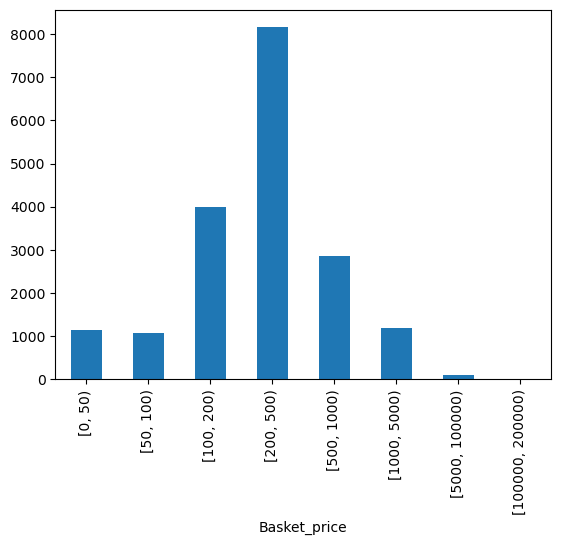

In [100]:
counts.plot(kind='bar');

### categorize products

group products into different categories by description, use it as the feature for customer segementation

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize


In [102]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')

this function split the description into several single word and categorize the word into different parts of speech, then I filter out other words other than the `noun words`

In [103]:
def keywords_inventory(dataframe, column_name = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    roots_dict  = dict()  
    keywords_dict = dict()
    roots_count  = dict()
    keywords_list   = []

    for row in dataframe[column_name]:
        if pd.isnull(row): 
            continue
        row = row.lower()
        tokenized = nltk.word_tokenize(row)
        nouns_list = [word for word, tag in nltk.pos_tag(tokenized) if tag[:2] == 'NN']
        
        for nouns in nouns_list:
            nouns = nouns.lower()
            root = stemmer.stem(nouns)
            if root in roots_dict:               
                roots_dict[root].add(nouns)
                roots_count[root] += 1                
            else:
                roots_dict[root] = {nouns}
                roots_count[root] = 1
    
    for root in roots_dict.keys():
        if len(roots_dict[root]) > 1:  
            shortest_word = min(roots_dict[root], key=len)            
            keywords_list.append(shortest_word)
            keywords_dict[root] = shortest_word
        else:
            keywords_list.append(list(roots_dict[root])[0])
            keywords_dict[root] = list(roots_dict[root])[0]
                   
    print(f'The counts of simplest nouns {len(roots_count)}')
    return roots_dict, roots_count, keywords_list, keywords_dict

In [104]:
df_products = pd.DataFrame(df_initial['Description'].unique()).rename(columns={0: 'Description'})

keywords_dict, keywords_count, keywords_list, shortest_keywords = keywords_inventory(df_products)


The counts of simplest nouns 1483


the rank of the number of cognate word occurrences

In [105]:
import re

list_products = [[word, count] for word, count in keywords_count.items() if word not in ('pink', 'blue', 'tag', 'green', 'orange')
                                                                              and len(word) >= 3 and count > 13 
                                                                              and bool(re.search(r'^\w+', word))]
print(f'product counts: {len(list_products)}')

product counts: 177


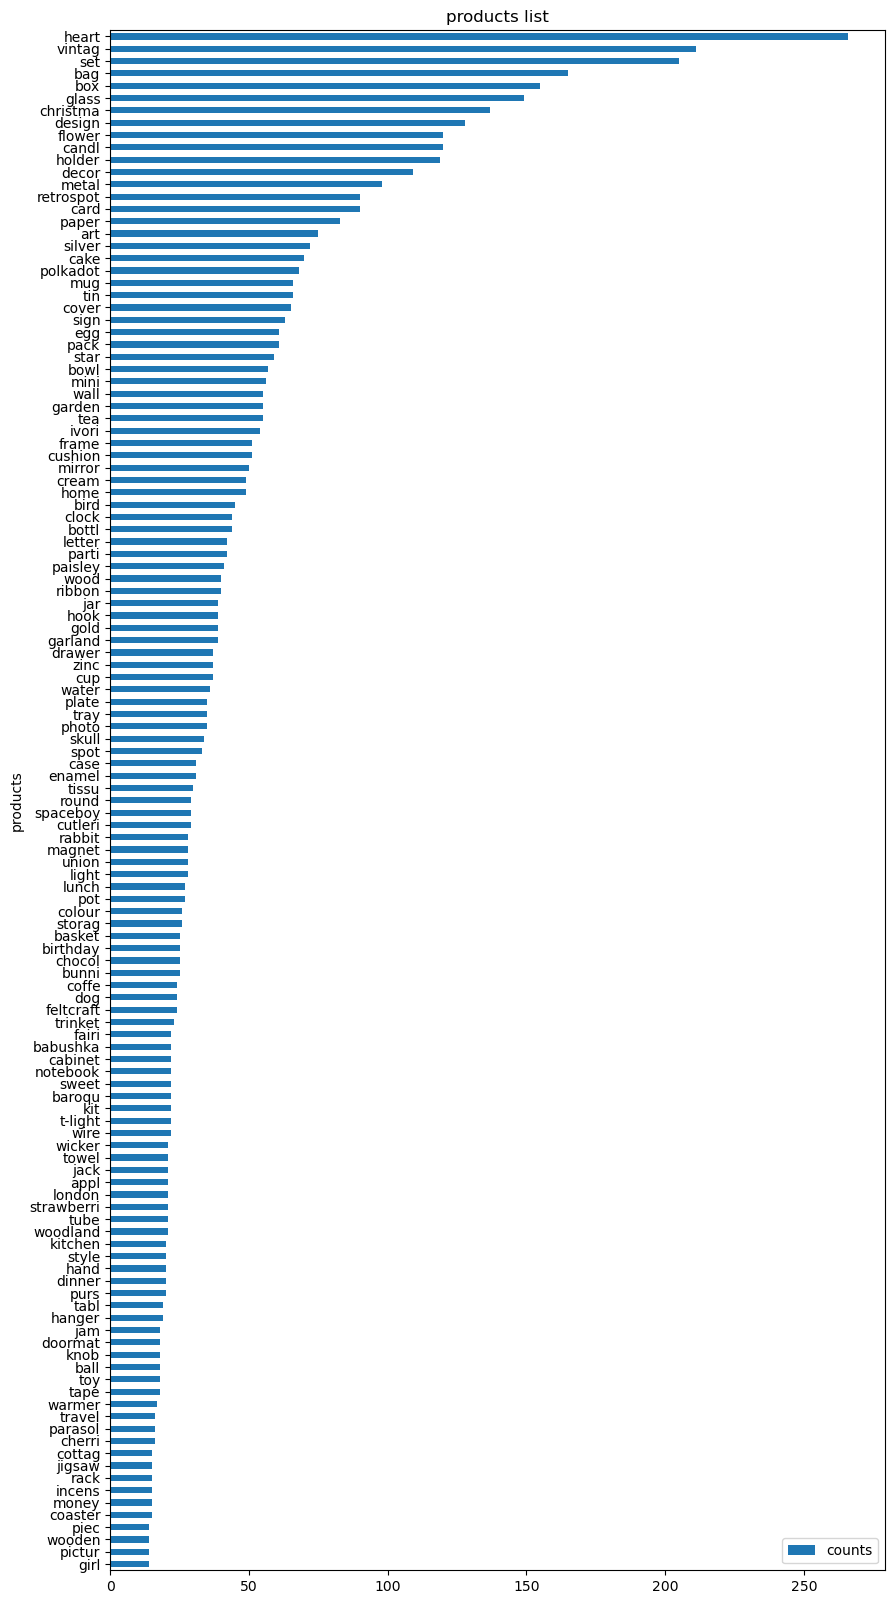

In [106]:
df = pd.DataFrame(list_products)[:125].rename(columns={0: 'products', 1: 'counts'}).sort_values('counts', ascending=True)
ax = df.plot(kind='barh', x='products', y='counts', 
             figsize=(10, 20), 
             title='products list');

Boolean feature encoding

In [107]:
arr = df_cleaned['Description'].unique()
mask = pd.isna(arr)
arr[mask] = 'Unknown'

In [108]:
# data = {key: list(map(lambda x:int(key.upper() in x), arr)) for key, value in list_products}
# X = pd.DataFrame(data)

X = pd.concat(
    [pd.Series(list(map(lambda x: int(key.upper() in x), arr)), name=key) for key, value in list_products],
    axis=1
)

In [109]:
bins = [0, 1, 2, 3, 5, 10, 20, 30, 40, np.inf]
pd.cut(df_cleaned['UnitPrice'], bins=bins).value_counts()

UnitPrice
(1.0, 2.0]      116075
(0.0, 1.0]       91753
(2.0, 3.0]       77227
(3.0, 5.0]       56899
(5.0, 10.0]      39936
(10.0, 20.0]      9682
(40.0, inf]        404
(20.0, 30.0]       371
(30.0, 40.0]       345
Name: count, dtype: int64

`categorize products into different unit price bins` combine `the keywords encoding` dataframe

In [110]:
unit_price = df_cleaned.groupby('Description')['UnitPrice'].mean().reindex(arr).reset_index().drop('Description', axis=1)
bins = [0, 1, 2, 3, 5, 10, np.inf]
categories = pd.cut(unit_price['UnitPrice'], bins=bins).to_frame()
price_encoding = pd.get_dummies(categories, prefix='', prefix_sep='').astype('int64')
X = pd.concat([X, price_encoding], axis=1)
X.head(10)


,heart,holder,metal,cream,hanger,union,water,bottl,box,glass,...,shell,bead,orbit,doiley,"(0.0, 1.0]","(1.0, 2.0]","(2.0, 3.0]","(3.0, 5.0]","(5.0, 10.0]","(10.0, inf]"
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


the numbers of unit price range of products in the `(1.0, 2.0]` and `(0.0, 1.0]` accounting for `50% of total`

In [111]:
temp = X.iloc[:, -6: ].sum()
(temp/temp.sum() * 100).sort_values(ascending=False).rename('percent')

(1.0, 2.0]     25.995861
(0.0, 1.0]     24.909467
(2.0, 3.0]     17.408174
(3.0, 5.0]     15.571650
(5.0, 10.0]    12.105535
(10.0, inf]     4.009312
Name: percent, dtype: float64

Sales MoM

In [112]:
df_initial['yearmonth'] = df_initial['InvoiceDate'].dt.strftime('%Y-%m')
temp = df_initial.groupby('yearmonth')[['UnitPrice', 'Quantity']].apply(lambda x: (x['UnitPrice'] * x['Quantity']).sum())
(temp-temp.shift(1))/temp.shift(1) * 100

yearmonth
2010-12          NaN
2011-01   -14.236934
2011-02    -8.063175
2011-03    32.842928
2011-04   -26.505331
2011-05    52.158319
2011-06    -6.205321
2011-07    -5.561424
2011-08     7.322434
2011-09    51.095649
2011-10     4.729096
2011-11    15.771878
2011-12   -69.689842
dtype: float64

Average Order Value(AOV)

In [113]:
(df_initial['UnitPrice'] * df_initial['Quantity']).sum() / df_initial['InvoiceNo'].nunique()

373.0743318611988

Rolling 3 months average sales(rolling growth)

In [114]:
temp = df_initial.resample('ME', on='InvoiceDate')[['UnitPrice', 'Quantity']].apply(lambda x: (x['UnitPrice'] * x['Quantity']).sum()).reset_index(name='sales')
temp['yearmonth'] = temp['InvoiceDate'].dt.to_period('M')
(temp['sales'].rolling(3).mean() - temp['sales'].rolling(3).mean().shift(1))/temp['sales'].rolling(3).mean().shift(1) * 100

0           NaN
1           NaN
2           NaN
3      1.792738
4     -3.260375
5     14.692751
6      1.713480
7      8.807690
8     -1.747883
9     17.965694
10    18.898949
11    20.325246
12   -19.403239
Name: sales, dtype: float64

Repeat purchase rate

In [115]:
(df_initial.groupby('CustomerID')['InvoiceDate'].count() > 1).mean() * 100

98.19304666056725

Customer retention rate

In [ ]:
temp = df_initial.copy()
temp['first_order_month'] = df_initial.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
temp['order_month'] = df_initial['InvoiceDate'].dt.to_period('M')
cohort_data = temp.groupby(['first_order_month', 'order_month'])['CustomerID'].nunique().reset_index(name='n_customers')

retention_matrix = cohort_data.pivot(
                        index='first_order_month',
                        columns='order_month',
                        values='n_customers'
                    )


baseline_values = retention_matrix.apply(lambda row: row.dropna().iloc[0], axis=1)


retention_rate_matrix = retention_matrix.div(baseline_values, axis=0) * 100

retention_rate_matrix

order_month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
first_order_month,,,,,,,,,,,,,
2010-12,100.0,38.185654,33.438819,38.713080,35.970464,39.662447,37.974684,35.443038,35.443038,39.451477,37.341772,50.000000,27.426160
2011-01,NaN,100.000000,23.990499,28.266033,24.228029,32.779097,29.928741,26.128266,25.653207,31.116390,34.679335,36.817102,14.964371
2011-02,NaN,NaN,100.000000,24.736842,19.210526,27.894737,26.842105,24.736842,25.526316,28.157895,25.789474,31.315789,9.210526
2011-03,NaN,NaN,NaN,100.000000,19.090909,25.454545,21.818182,23.181818,17.727273,26.363636,23.863636,28.863636,8.863636
2011-04,NaN,NaN,NaN,NaN,100.000000,22.742475,22.073579,21.070234,20.735786,23.745819,23.076923,26.086957,8.361204
2011-05,NaN,NaN,NaN,NaN,NaN,100.000000,23.655914,17.204301,17.204301,21.505376,24.372760,26.523297,10.394265
2011-06,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,20.851064,18.723404,27.234043,24.680851,33.617021,10.212766
2011-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,20.942408,20.418848,23.036649,27.225131,11.518325
2011-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,25.149701,25.149701,25.149701,13.772455


# 4.K-means clustering (data modeling)

In [117]:
matrix = X.to_numpy()
matrix.shape

(3866, 183)

test the number of clusters which get highest sihouette score, I choose `n_clusters=5` to finish the follow analysis

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(3,20):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.10889620663362934
For n_clusters = 4 The average silhouette_score is : 0.1355845429121718
For n_clusters = 5 The average silhouette_score is : 0.15620998540830885
For n_clusters = 6 The average silhouette_score is : 0.1319099750231291
For n_clusters = 7 The average silhouette_score is : 0.1364959403393926
For n_clusters = 8 The average silhouette_score is : 0.1543597954579893
For n_clusters = 9 The average silhouette_score is : 0.15785942154041024
For n_clusters = 10 The average silhouette_score is : 0.13644153746714935
For n_clusters = 11 The average silhouette_score is : 0.1273041693830255
For n_clusters = 12 The average silhouette_score is : 0.1453037596319979
For n_clusters = 13 The average silhouette_score is : 0.11182129016889875
For n_clusters = 14 The average silhouette_score is : 0.1298622265524943
For n_clusters = 15 The average silhouette_score is : 0.13863808772652034
For n_clusters = 16 The average silhouette_score is 

In [119]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.15416729879921567


the number of each clusters

In [120]:
pd.Series(clusters).value_counts()

3    1118
1    1005
4     673
0     602
2     468
Name: count, dtype: int64

In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.cm as cm

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10]) # mat_size=len(X) 4079
    
    y_lower = 10
    for i in range(n_clusters): # 0 1 2 3 4
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # cmap = cm.get_cmap("Spectral")
        # color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'black', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

silhouette plot

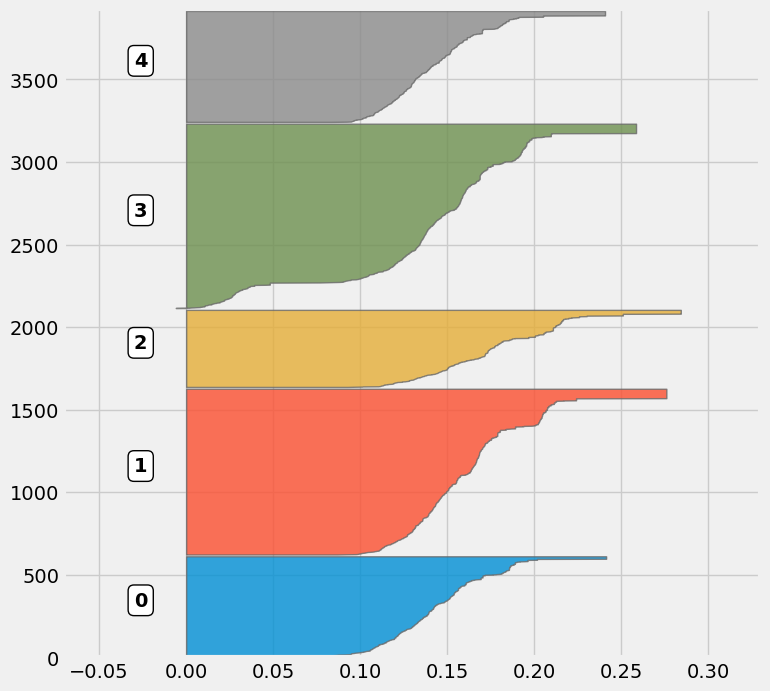

In [122]:
from sklearn.metrics import silhouette_samples

sample_silhouette_values = silhouette_samples(matrix, clusters)

graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

visualize `top 30 products' keywords` in 5 clusters

In [123]:
description_df = pd.DataFrame(arr)
keywords_list = [word for word, count in list_products]
occurence = [{} for _ in range(n_clusters)]

for i in range(n_clusters):
    for word in keywords_list:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']:
            continue
        occurence[i][word] = description_df[clusters==i].loc[:, 0].str.contains(word.upper()).sum()


In [124]:
description_df = pd.DataFrame(arr).rename(columns= {0: 'description'})
description_df['clusters'] = clusters
temp = []
for word, count in list_products:
    temp.append(description_df['description'].str.contains(word.upper()).rename(word))
grouped_df = pd.concat([description_df, pd.concat(temp, axis=1)], axis=1).groupby(['clusters']).sum().drop(['art', 'set', 'heart'], axis=1)
occurence2 = [grouped_df.loc[i, :].drop('description').to_dict() for i in range(5)]


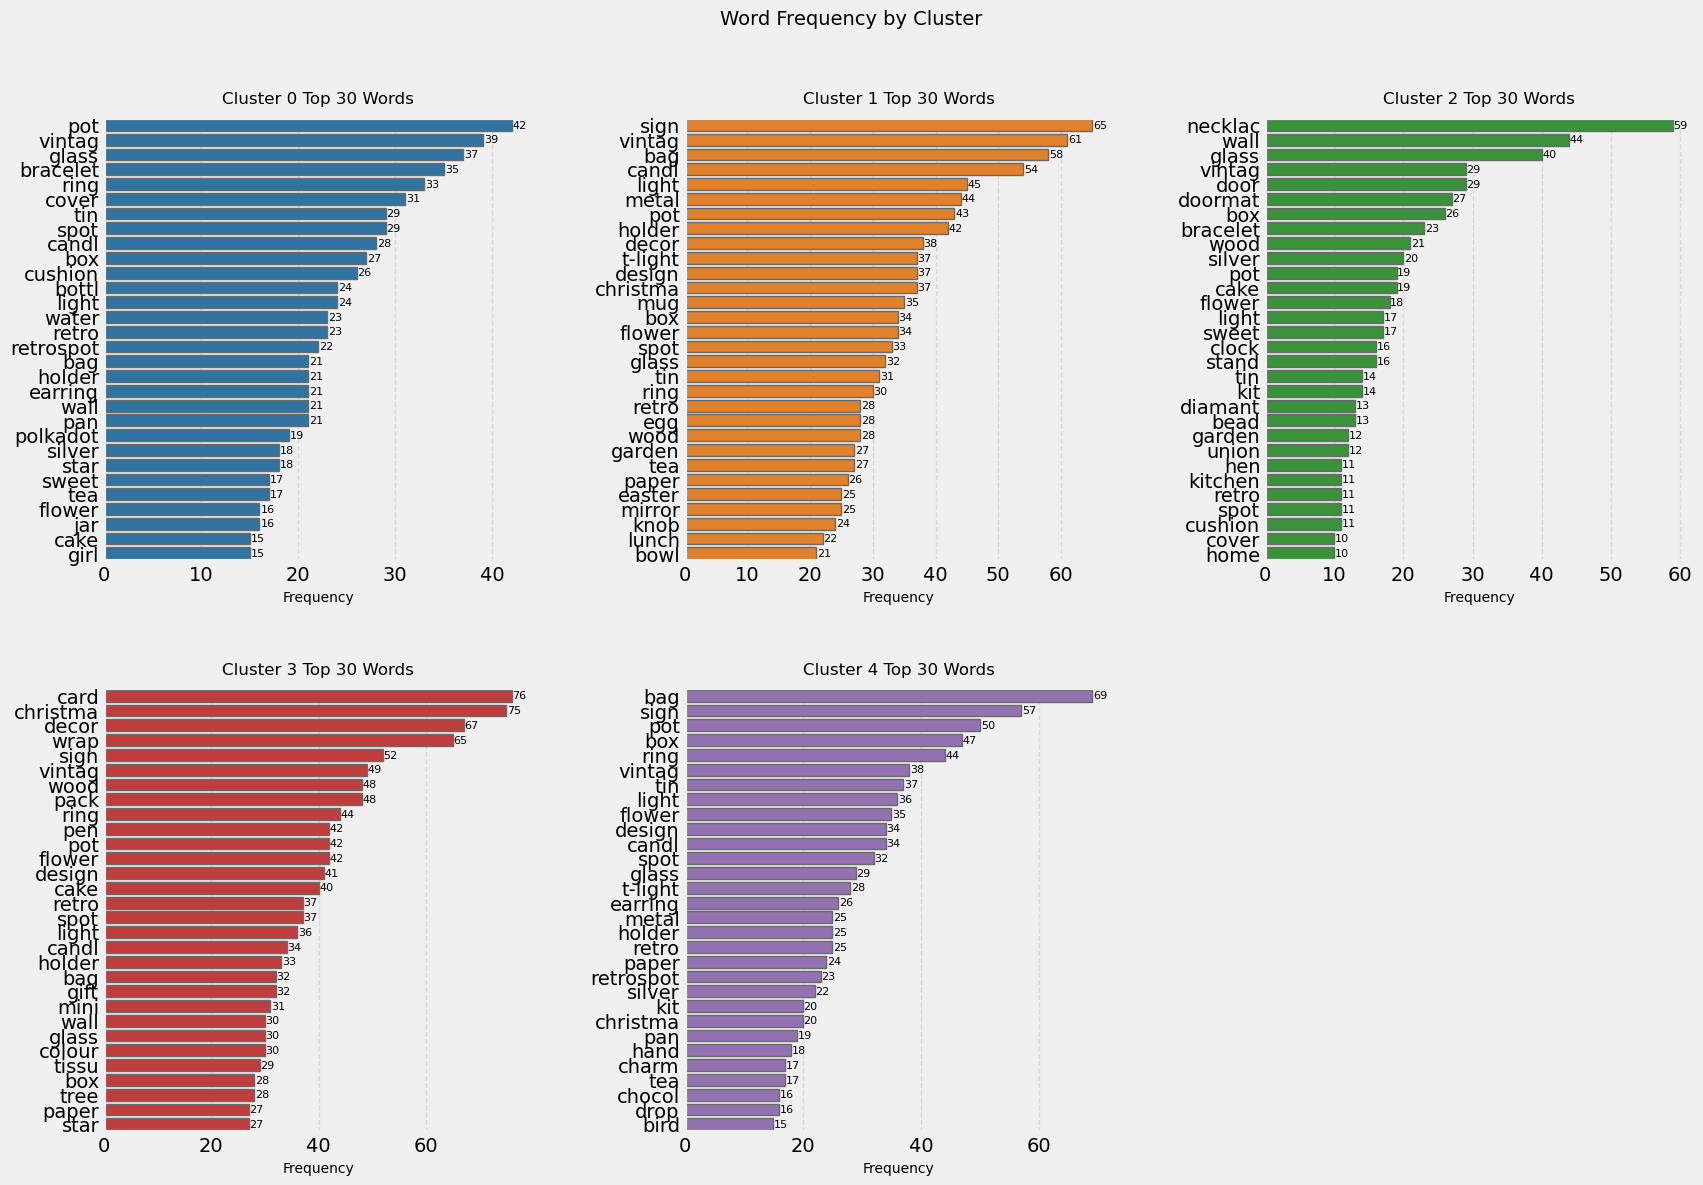

In [ ]:
import seaborn as sns

plt.figure(figsize=(18, 12))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i in range(5):
 
    ax = plt.subplot(2, 3, i+1)
    

    words = list(occurence2[i].keys())
    counts = list(occurence2[i].values())
    df = pd.DataFrame({'words': words, 'counts': counts}).sort_values('counts', ascending=False)[:30]
    

    sns.barplot(data=df, y='words', x='counts', color=colors[i], ax=ax)
    

    ax.set_title(f'Cluster {i} Top 30 Words', fontsize=12, pad=10)
    ax.set_xlabel('Frequency', fontsize=10)
    ax.set_ylabel('')
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    
   
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, 
                p.get_y() + p.get_height()/2, 
                f'{int(width)}', 
                va='center', fontsize=8)

plt.tight_layout(pad=3)  
plt.suptitle('Word Frequency by Cluster', y=1.02, fontsize=14)
plt.show()

PCA

This datasets need more than 100 dimensions to explain `90%` of the variance of the data.

In [126]:
from sklearn.decomposition import PCA

for i in range(1, 100):
    pca = PCA(n_components=i)
    pca.fit(matrix)
    print(f'{i}th: {np.cumsum(pca.explained_variance_ratio_)[-1]}')

1th: 0.07937748090760625
2th: 0.144193077347941
3th: 0.19631300600496404
4th: 0.24594807746550648
5th: 0.2878608835641632
6th: 0.32270545350641267
7th: 0.34935847367310885
8th: 0.37370322793114863
9th: 0.39629251832787177
10th: 0.41420249729292746
11th: 0.42953555854556813
12th: 0.4442839579239587
13th: 0.4587559251554686
14th: 0.47226236456596987
15th: 0.4852403000394112
16th: 0.4980345173666154
17th: 0.5101219968976969
18th: 0.5212057628985756
19th: 0.5319604631757385
20th: 0.5425608311737746
21th: 0.5528544748121785
22th: 0.5625788171045594
23th: 0.5718615454961345
24th: 0.5809500786601488
25th: 0.5894449825231217
26th: 0.5976949697196705
27th: 0.6056345497388531
28th: 0.6133965113430052
29th: 0.6210567244925289
30th: 0.6285740488678168
31th: 0.635758992303686
32th: 0.6427293127811275
33th: 0.6495649574444806
34th: 0.6562512495623399
35th: 0.6627831114332315
36th: 0.6691090871497339
37th: 0.6753661396639545
38th: 0.6814613815826803
39th: 0.6875185674839901
40th: 0.6932831611926817
4

map the corresonpding cluster number to products of dataset

In [127]:
corresp = dict()
for key, val in zip (arr, clusters):
    corresp[key] = val

df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)
df_cleaned.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,Totalprice,InvoiceDate_int,categ_product
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.3,1291191960000000000,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.0,1291191960000000000,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0,15.3,1291191960000000000,2
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0,25.5,1291191960000000000,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.1,1291192080000000000,4
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.1,1291192080000000000,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,0,54.08,1291192440000000000,1


set the total price to respective cluster number

In [128]:
for i in range(5):
    df_cleaned[f'cluster_{i}'] = 0.
    df_cleaned.loc[df_cleaned['categ_product'] == i, f'cluster_{i}'] = df_cleaned.loc[df_cleaned['categ_product'] == i, 'Totalprice']

df_cleaned.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,Totalprice,InvoiceDate_int,categ_product,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.3,1291191960000000000,4,0.00,0.00,0.0,0.0,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000,0,20.34,0.00,0.0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.0,1291191960000000000,0,22.00,0.00,0.0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000,0,20.34,0.00,0.0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,1291191960000000000,0,20.34,0.00,0.0,0.0,0.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0,15.3,1291191960000000000,2,0.00,0.00,15.3,0.0,0.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0,25.5,1291191960000000000,0,25.50,0.00,0.0,0.0,0.0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.1,1291192080000000000,4,0.00,0.00,0.0,0.0,11.1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,11.1,1291192080000000000,1,0.00,11.10,0.0,0.0,0.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,0,54.08,1291192440000000000,1,0.00,54.08,0.0,0.0,0.0


In [129]:
df_cleaned.groupby(['InvoiceNo', 'CustomerID'])[['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']].sum().reset_index()

,InvoiceNo,CustomerID,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,536365,17850,108.52,0.00,15.30,0.00,15.30
1,536366,17850,0.00,11.10,0.00,0.00,11.10
2,536367,13047,55.50,63.98,114.15,19.90,25.20
3,536368,13047,70.05,0.00,0.00,0.00,0.00
4,536369,13047,0.00,0.00,17.85,0.00,0.00
...,...,...,...,...,...,...,...
18531,581583,13777,0.00,58.00,0.00,0.00,66.60
18532,581584,13777,0.00,0.00,0.00,51.84,88.80
18533,581585,15804,77.00,108.52,17.85,100.72,24.96
18534,581586,13113,0.00,30.00,309.20,0.00,0.00


In [130]:
pd.to_datetime(df_cleaned.groupby(['InvoiceNo', 'CustomerID'])['InvoiceDate_int'].mean()).reset_index()

,InvoiceNo,CustomerID,InvoiceDate_int
0,536365,17850,2010-12-01 08:26:00
1,536366,17850,2010-12-01 08:28:00
2,536367,13047,2010-12-01 08:34:00
3,536368,13047,2010-12-01 08:34:00
4,536369,13047,2010-12-01 08:35:00
...,...,...,...
18531,581583,13777,2011-12-09 12:23:00
18532,581584,13777,2011-12-09 12:25:00
18533,581585,15804,2011-12-09 12:31:00
18534,581586,13113,2011-12-09 12:49:00


aggregate `invoice_date` and `total_price` for each invoice

In [131]:
basket_price = df_cleaned.groupby(['InvoiceNo', 'CustomerID'])[['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']].sum().reset_index()

basket_price['InvoiceDate'] = (pd.to_datetime(df_cleaned.groupby(['InvoiceNo', 'CustomerID'])['InvoiceDate_int'].mean()).reset_index()).iloc[:, 2]
basket_price['total_price'] = basket_price[[f'cluster_{i}' for i in range(5)]].sum(axis=1)

In [132]:
# clear up the dataset
basket_price = basket_price.sort_values('CustomerID', ascending=True).reset_index(drop=True)\
                .reindex(columns=['CustomerID', 'InvoiceNo', 'InvoiceDate', 'total_price', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])
basket_price.head()

,CustomerID,InvoiceNo,InvoiceDate,total_price,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,12346,541431,2011-01-18 10:01:00,77183.60,0.00,77183.6,0.0,0.00,0.00
1,12347,573511,2011-10-31 12:25:00,1294.32,368.72,203.3,55.6,230.80,435.90
2,12347,581180,2011-12-07 15:52:00,224.82,0.00,100.8,30.0,38.58,55.44
3,12347,556201,2011-06-09 13:01:00,382.52,168.76,74.4,19.9,41.40,78.06
4,12347,562032,2011-08-02 08:48:00,584.91,158.16,109.7,97.8,99.55,119.70


aggregate new dataset to describe the feature of each order
1. count, min, max, mean, sum of total price for certain customer
2. each clusters price account for total price for each customer

In [133]:
transaction_per_user = basket_price.groupby('CustomerID')['total_price'].agg(['count','min','max','mean','sum']).reset_index()

In [134]:
transaction_per_user.head()

,CustomerID,count,min,max,mean,sum
0,12346,1,77183.60,77183.60,77183.600000,77183.60
1,12347,7,224.82,1294.32,615.714286,4310.00
2,12348,4,227.44,892.80,449.310000,1797.24
3,12349,1,1757.55,1757.55,1757.550000,1757.55
4,12350,1,334.40,334.40,334.400000,334.40


In [135]:
temp_df = basket_price.groupby('CustomerID')[['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']].sum().reset_index(drop=True)
temp_df.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,0.00,77183.60,0.00,0.00,0.00
1,1273.19,1119.40,327.74,692.97,896.70
2,0.00,754.00,0.00,1043.24,0.00
3,188.30,465.86,358.35,529.82,215.22
4,0.00,144.60,0.00,96.50,93.30


In [136]:
transaction_per_user = pd.concat([transaction_per_user, (temp_df.div(temp_df.sum(axis=1), axis=0) * 100)], axis=1)
transaction_per_user.columns.values[-5:] = ['percent_0', 'percent_1','percent_2','percent_3','percent_4']

transaction_per_user

,CustomerID,count,min,max,mean,sum,percent_0,percent_1,percent_2,percent_3,percent_4
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,100.000000,0.000000,0.000000,0.000000
1,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,25.972158,7.604176,16.078190,20.805104
2,12348,4,227.44,892.80,449.310000,1797.24,0.000000,41.953217,0.000000,58.046783,0.000000
3,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,26.506216,20.389178,30.145373,12.245455
4,12350,1,334.40,334.40,334.400000,334.40,0.000000,43.241627,0.000000,28.857656,27.900718
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280,1,180.60,180.60,180.600000,180.60,24.833887,0.000000,34.025471,0.000000,41.140642
4335,18281,1,80.82,80.82,80.820000,80.82,0.000000,20.415739,0.000000,60.653304,18.930958
4336,18282,2,77.84,98.76,88.300000,176.60,24.405436,12.995470,0.000000,42.553794,20.045300
4337,18283,16,1.95,307.05,127.845625,2045.53,5.614682,33.535563,1.899263,17.378381,41.572111


the percentage for customers for `just have one purchase`

In [137]:
(transaction_per_user[transaction_per_user['count'] == 1]).shape[0] / transaction_per_user.shape[0] * 100

34.43189675040332

calculate `the interval between the first purchase, last purchase date` and `last date of entire dataset` for each customers

In [138]:
last_date = basket_price.InvoiceDate.max().date()
first_purchase_interval = basket_price.groupby('CustomerID')['InvoiceDate'].min().map(lambda x: (last_date - x.date()).days).reset_index(drop=True).rename('first_purchase_interval')
last_purchase_interval = basket_price.groupby('CustomerID')['InvoiceDate'].max().map(lambda x: (last_date - x.date()).days).reset_index(drop=True).rename('last_purchase_interval')

In [139]:
transaction_per_user = pd.concat([transaction_per_user, first_purchase_interval, last_purchase_interval], axis=1)
transaction_per_user.head(10)

,CustomerID,count,min,max,mean,sum,percent_0,percent_1,percent_2,percent_3,percent_4,first_purchase_interval,last_purchase_interval
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,100.000000,0.000000,0.000000,0.000000,325,325
1,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,25.972158,7.604176,16.078190,20.805104,367,2
2,12348,4,227.44,892.80,449.310000,1797.24,0.000000,41.953217,0.000000,58.046783,0.000000,358,75
3,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,26.506216,20.389178,30.145373,12.245455,18,18
4,12350,1,334.40,334.40,334.400000,334.40,0.000000,43.241627,0.000000,28.857656,27.900718,310,310
5,12352,8,120.33,840.30,313.255000,2506.04,14.492985,17.747522,13.986209,48.484861,5.288423,296,36
6,12353,1,89.00,89.00,89.000000,89.00,0.000000,13.033708,22.359551,44.719101,19.887640,204,204
7,12354,1,1079.40,1079.40,1079.400000,1079.40,19.700760,31.176580,16.235872,22.061330,10.825459,232,232
8,12355,1,459.40,459.40,459.400000,459.40,25.272094,53.286896,0.000000,9.882455,11.558555,214,214
9,12356,3,58.35,2271.62,937.143333,2811.43,7.256094,28.062232,13.184749,38.909025,12.587900,325,22


In [140]:
transaction_per_user.head(10)

,CustomerID,count,min,max,mean,sum,percent_0,percent_1,percent_2,percent_3,percent_4,first_purchase_interval,last_purchase_interval
0,12346,1,77183.60,77183.60,77183.600000,77183.60,0.000000,100.000000,0.000000,0.000000,0.000000,325,325
1,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,25.972158,7.604176,16.078190,20.805104,367,2
2,12348,4,227.44,892.80,449.310000,1797.24,0.000000,41.953217,0.000000,58.046783,0.000000,358,75
3,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,26.506216,20.389178,30.145373,12.245455,18,18
4,12350,1,334.40,334.40,334.400000,334.40,0.000000,43.241627,0.000000,28.857656,27.900718,310,310
5,12352,8,120.33,840.30,313.255000,2506.04,14.492985,17.747522,13.986209,48.484861,5.288423,296,36
6,12353,1,89.00,89.00,89.000000,89.00,0.000000,13.033708,22.359551,44.719101,19.887640,204,204
7,12354,1,1079.40,1079.40,1079.400000,1079.40,19.700760,31.176580,16.235872,22.061330,10.825459,232,232
8,12355,1,459.40,459.40,459.400000,459.40,25.272094,53.286896,0.000000,9.882455,11.558555,214,214
9,12356,3,58.35,2271.62,937.143333,2811.43,7.256094,28.062232,13.184749,38.909025,12.587900,325,22


data encoding

In [141]:
matrix = transaction_per_user[['count','min','max','mean','percent_0','percent_1','percent_2','percent_3','percent_4']].dropna().to_numpy()

standardize the data

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(matrix)
scaled_matrix

array([[-4.24732648e-01,  6.33194197e+01,  2.48409273e+01, ...,
        -9.52646925e-01, -1.22396593e+00, -1.28265944e+00],
       [ 3.53948859e-01, -2.97395341e-02,  2.09506896e-01, ...,
        -4.61242549e-01, -3.07722394e-01, -4.43971522e-02],
       [-3.53918942e-02, -2.75828627e-02,  7.91853555e-02, ...,
        -9.52646925e-01,  2.08393060e+00, -1.28265944e+00],
       ...,
       [-2.94952397e-01, -1.50727151e-01, -1.78536592e-01, ...,
        -9.52646925e-01,  1.20103577e+00, -8.96186029e-02],
       [ 1.52197112e+00, -2.13196537e-01, -1.10931806e-01, ...,
        -8.29910912e-01, -2.33628763e-01,  1.19159765e+00],
       [-1.65172145e-01, -1.56620956e-01,  1.14407744e-01, ...,
        -8.33058152e-01, -2.21499669e-01,  2.09871412e-01]])

use isolation foreset to filter out the outliers the proportion=0.01

In [143]:
from sklearn.ensemble import IsolationForest


iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers_iso = iso_forest.fit_predict(scaled_matrix) == -1
scaled_matrix = scaled_matrix[~outliers_iso]

`5 dimension` PCA-ed data can represents `98% variation of 9 dimension` datasets

In [144]:
cum=0
for i in range(1, 9):
    if cum == 1:
        break
    pca = PCA(n_components=i)
    pca.fit(scaled_matrix)
    cum = np.cumsum(pca.explained_variance_ratio_)[-1]
    print(f'{i}th: {cum}')

1th: 0.25052231810495107
2th: 0.4765942171644172
3th: 0.6752012333820079
4th: 0.8522558621051913
5th: 0.9846265069321405
6th: 0.9962707769212605
7th: 0.9997375701172825
8th: 1.0000000000000002


In [151]:
pca = PCA(n_components=5)
pcaed = pca.fit_transform(scaled_matrix)

In [154]:
for n in range(2,20):
    n_clusters=n
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(pcaed)
    clusters_clients = kmeans.predict(pcaed)
    silhouette_avg = silhouette_score(pcaed, clusters_clients)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.16114560481715468
For n_clusters = 3 The average silhouette_score is : 0.18183965615662478
For n_clusters = 4 The average silhouette_score is : 0.19354599363739478
For n_clusters = 5 The average silhouette_score is : 0.20750647752572435
For n_clusters = 6 The average silhouette_score is : 0.23730949819918087
For n_clusters = 7 The average silhouette_score is : 0.25048453473031007
For n_clusters = 8 The average silhouette_score is : 0.20774800611843866
For n_clusters = 9 The average silhouette_score is : 0.21530296247994163
For n_clusters = 10 The average silhouette_score is : 0.2147751309382675
For n_clusters = 11 The average silhouette_score is : 0.21354286543106488
For n_clusters = 12 The average silhouette_score is : 0.2083021572583667
For n_clusters = 13 The average silhouette_score is : 0.19589751493413365
For n_clusters = 14 The average silhouette_score is : 0.1990339792381989
For n_clusters = 15 The average silhouette_score 

choose `n_clusters=7` since it get the highest silhouette score

In [155]:
n_clusters=7
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(pcaed)
clusters_clients = kmeans.predict(pcaed)
silhouette_avg = silhouette_score(pcaed, clusters_clients)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 7 The average silhouette_score is : 0.2511553934517179


In [156]:
pd.Series(clusters_clients).value_counts()

5    2091
4     636
0     447
6     381
3     339
2     337
1      63
Name: count, dtype: int64

In [889]:
pca = PCA(n_components=5)
pca_samples = pca.fit_transform(scaled_matrix)
pca_5 = pd.DataFrame(pca_samples)
pca_5['cluster'] = pd.Series(clusters_clients)
pca_5.head()

,0,1,2,3,4,cluster
0,0.030296,0.191883,0.991418,-0.075125,0.375299,0
1,-1.617001,-1.751248,-0.803302,0.401583,0.239185,3
2,0.889602,-0.716000,-0.771935,-0.653349,-0.418018,1
3,-1.389200,0.154196,-0.783332,-0.577099,-0.431046,2
4,1.871139,-1.044087,-0.862091,-0.560087,0.547158,1


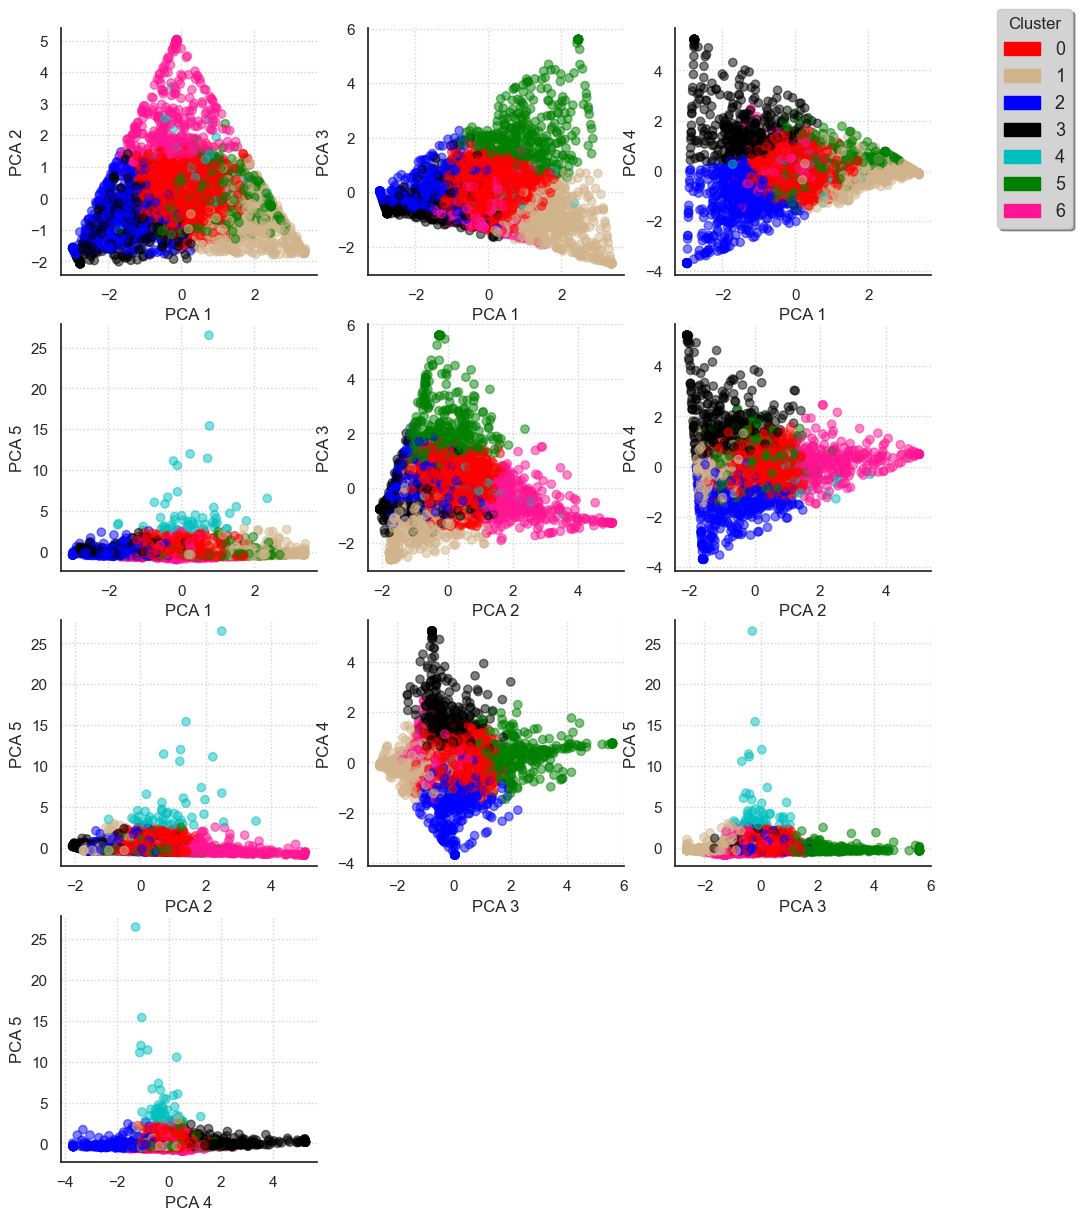

In [890]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in pca_5['cluster']]

fig = plt.figure(figsize = (10,14))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 5):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(pca_5[ix], pca_5[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure);

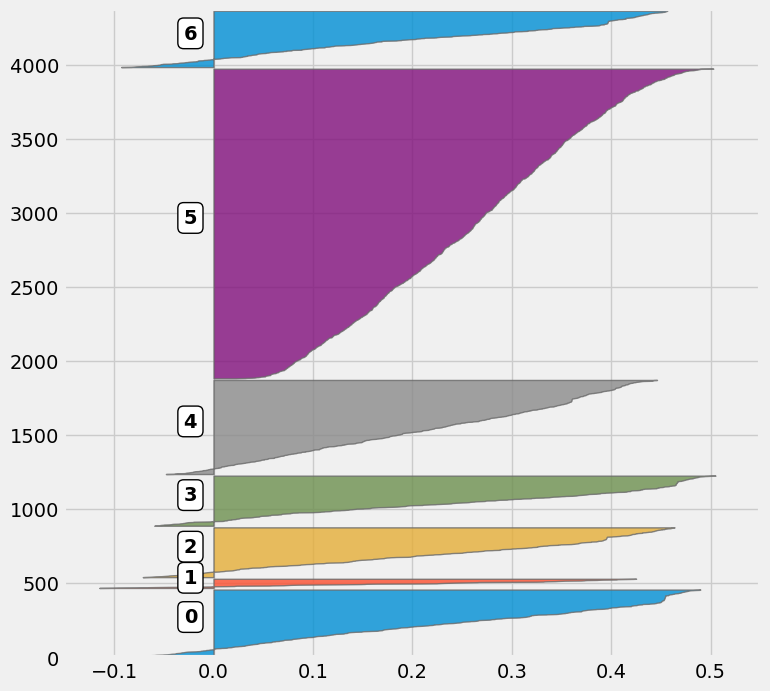

In [157]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

I `calculate the mean of metrics`(e.g., count, min, max...proportion of each cluster of products, percent0, percent1...) aggregated by customers' clusters.

In [158]:
transaction_per_user = transaction_per_user.dropna(axis=0)

In [159]:
transaction_per_user = transaction_per_user[~outliers_iso]

In [160]:
selected_customers = transaction_per_user.copy(deep=True)
selected_customers.dropna(inplace=True)
selected_customers['cluster'] = clusters_clients
selected_customers.head()

,CustomerID,count,min,max,mean,sum,percent_0,percent_1,percent_2,percent_3,percent_4,first_purchase_interval,last_purchase_interval,cluster
1,12347,7,224.82,1294.32,615.714286,4310.00,29.540371,25.972158,7.604176,16.078190,20.805104,367,2,5
2,12348,4,227.44,892.80,449.310000,1797.24,0.000000,41.953217,0.000000,58.046783,0.000000,358,75,0
3,12349,1,1757.55,1757.55,1757.550000,1757.55,10.713778,26.506216,20.389178,30.145373,12.245455,18,18,5
4,12350,1,334.40,334.40,334.400000,334.40,0.000000,43.241627,0.000000,28.857656,27.900718,310,310,4
5,12352,8,120.33,840.30,313.255000,2506.04,14.492985,17.747522,13.986209,48.484861,5.288423,296,36,0


In [161]:
description_df = selected_customers.groupby('cluster')[['count', 'min', 'max', 'mean', 'sum', 'percent_0',
                                                        'percent_1', 'percent_2', 'percent_3', 'percent_4',
                                                        'first_purchase_interval', 'last_purchase_interval']].mean()

description_df['amount'] = selected_customers['cluster'].value_counts().sort_index()

Then I `search the max proportion of percent0 to percent4 ` respectively.

In [162]:
temp = []
for i in range(5):
    temp.append(description_df.sort_values(f'percent_{i}', ascending=False).iloc[0].name)

temp += [i for i in range(7) if i not in temp]
description_df = description_df.reindex(index=temp).reset_index()


In [163]:
description_df

,cluster,count,min,max,mean,sum,percent_0,percent_1,percent_2,percent_3,percent_4,first_purchase_interval,last_purchase_interval,amount
0,2,2.703264,237.066944,413.445104,314.888162,963.324896,52.552085,14.011448,9.957989,9.841519,13.636958,192.608309,102.121662,337
1,4,2.751572,233.209528,392.301053,304.716850,859.008995,8.723927,54.143248,5.402590,17.444028,14.286207,201.253145,108.103774,636
2,6,3.228346,208.099948,392.439449,289.898599,1023.684278,12.915933,11.753785,50.797369,12.153120,12.379794,235.981627,129.593176,381
3,0,2.346756,217.655928,369.256779,278.059274,703.283535,7.114274,15.672208,7.814489,59.304492,10.094537,199.581655,123.149888,447
4,3,3.268437,222.688850,447.702035,326.880654,1132.456519,7.751203,14.180557,6.235392,10.098489,61.734359,215.985251,101.244838,339
5,1,40.888889,46.250317,1553.052698,419.006219,16686.568889,16.490985,22.073848,16.131680,19.756471,25.547017,358.666667,10.333333,63
6,5,4.331420,239.918954,594.591718,393.642592,1713.591575,18.179802,24.776019,14.576200,20.039555,22.428425,233.416547,73.717838,2091


In [164]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

From the rader map, we can find
1. the first cluster account for large share for percent0, the second one account for large share for percent1 and so on
2. penultimate cluster is generalized
3. the last cluster dominate with sum and count

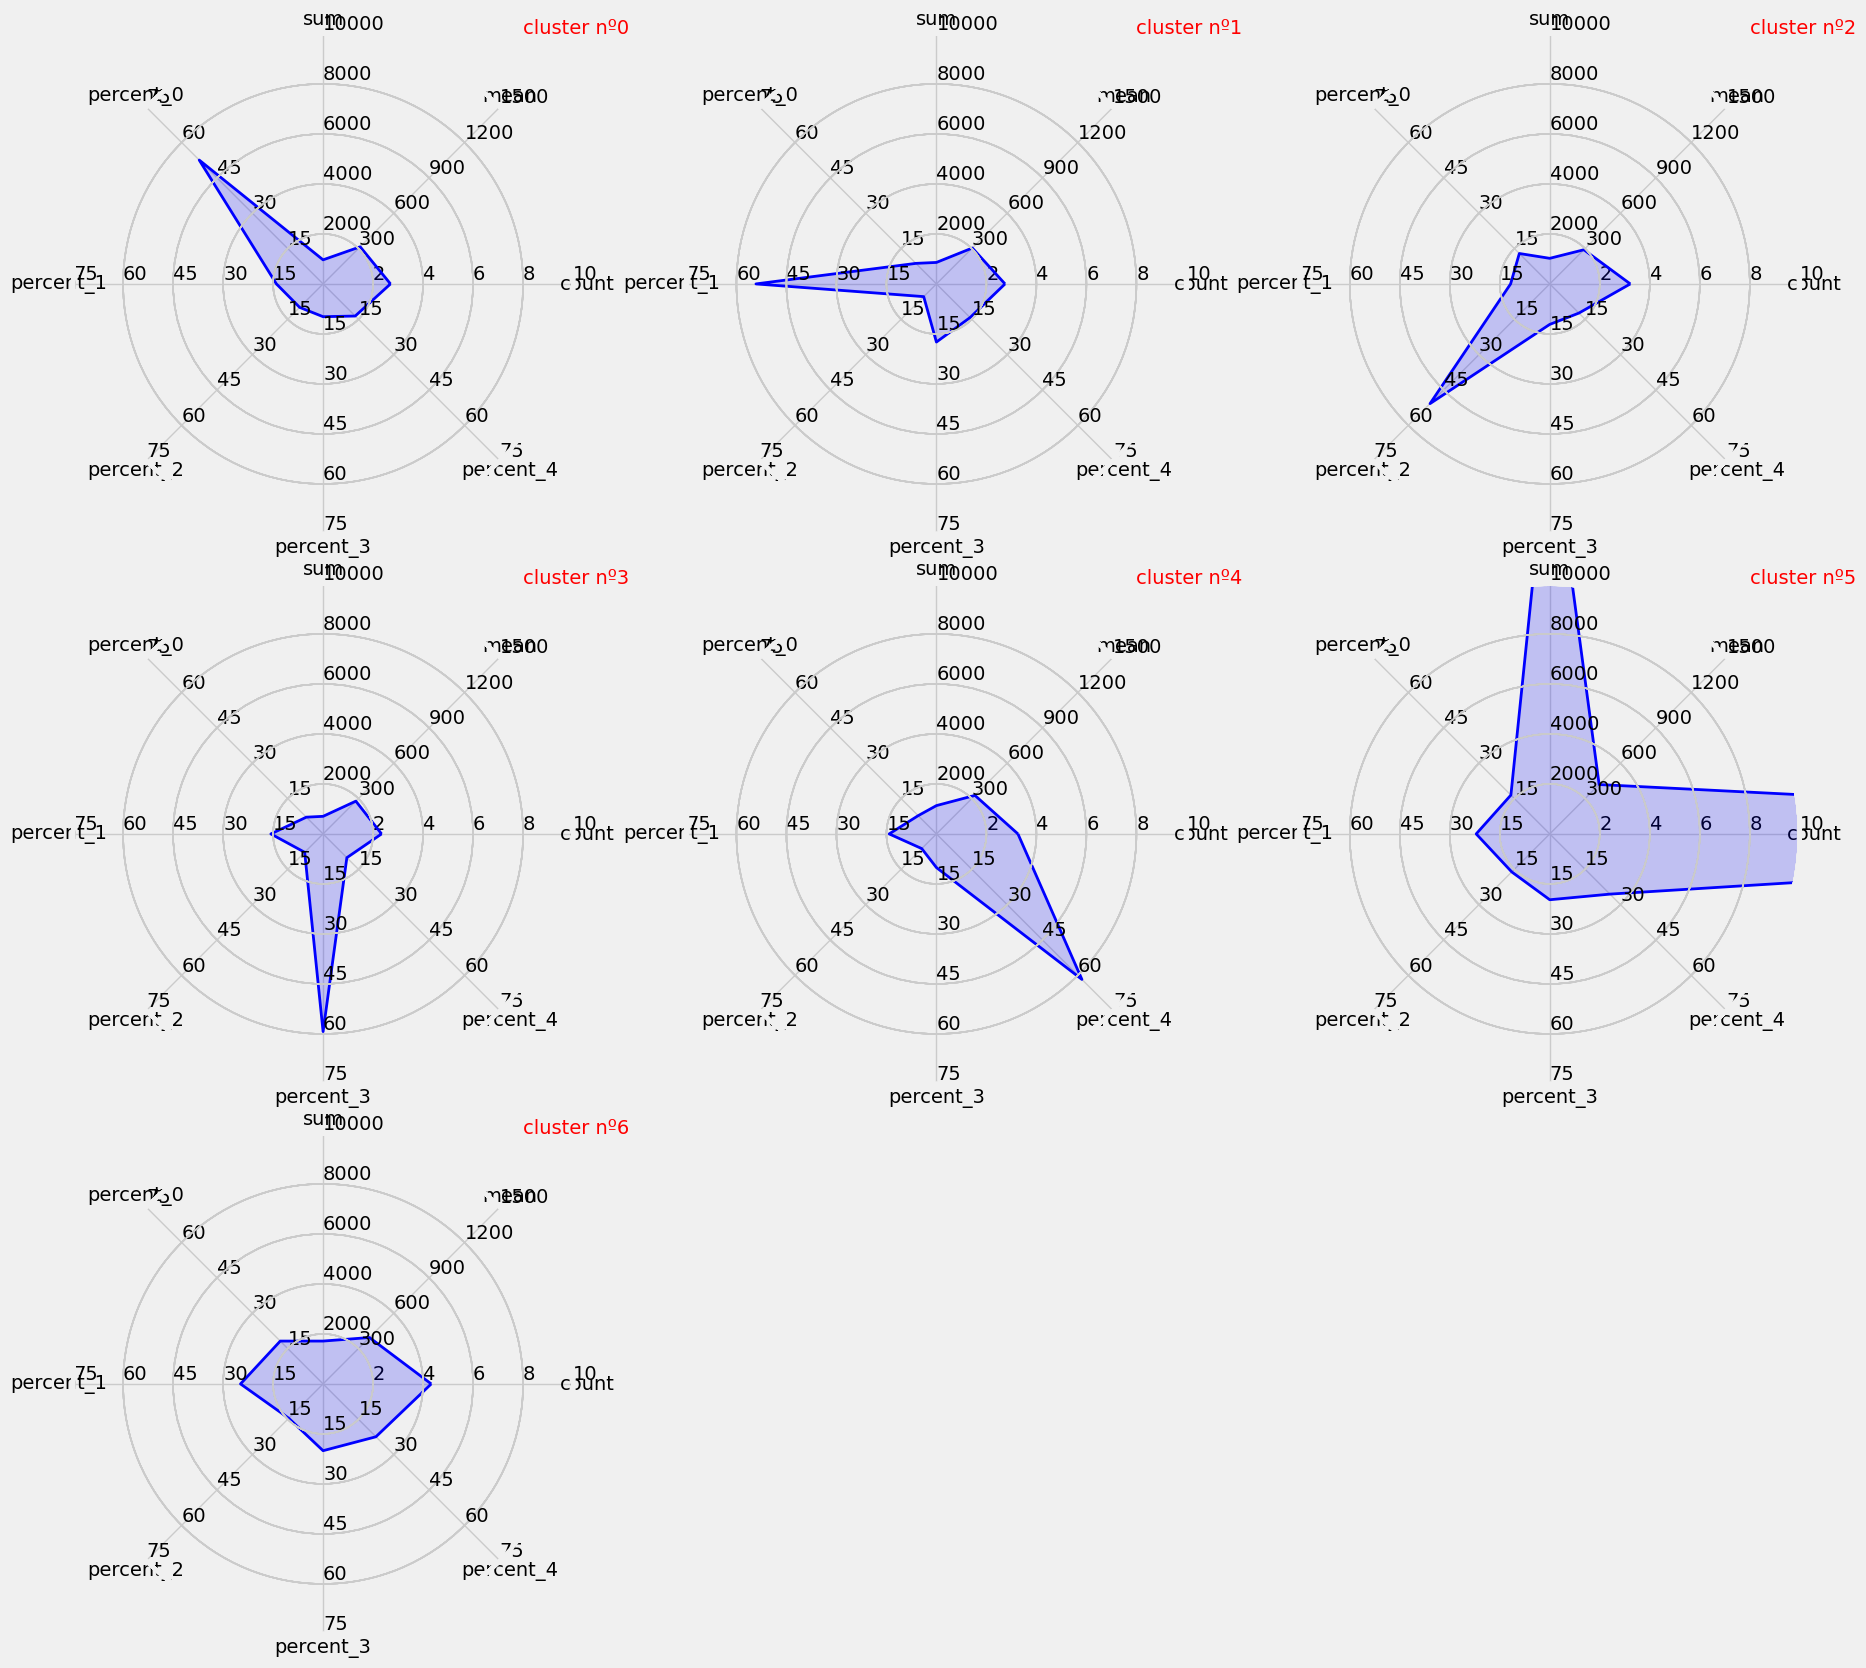

In [165]:
fig = plt.figure(figsize=(16,10))

attributes = ['count', 'mean', 'sum', 'percent_0', 'percent_1', 'percent_2', 'percent_3', 'percent_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(description_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 

# 5. Classification of customers (model prediction)

The goal of this section is to train the ML model to predict the customer segmentation and test the accuracy, which mimic automatically categorize the cluster when a new customer do a purchase and marketing can immediately take effective action to them

Split the entire dataset into train and test set, this is `the first split`, the test set will leave for ultimate prediction testing

In [900]:
from sklearn.model_selection import train_test_split

selected_customers, selected_customers_test = train_test_split(selected_customers, test_size=0.2, shuffle=False)

I just choose `features describe the basket content` to be the feature of training set, excluding features describe frequency; minimum, maximum invoice...

In [901]:
columns = ['mean', 'percent_0', 'percent_1', 'percent_2', 'percent_3', 'percent_4' ]
X = selected_customers[columns]
y = selected_customers['cluster']

scaler = StandardScaler()
X=scaler.fit_transform(X)

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(X) == -1
X = X[~outliers]
y = y[~outliers]

This is `the second split`, split the training dataset into traning(80%) and validation(20%) set

In [902]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8)


a class for fitting and predicting through the `Classifier` or finding the best parameters then fitting and predicting through `GridSearchCV`

In [903]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, X):
        return self.clf.predict(X)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X_train, y_train):
        self.grid.fit(X_train, y_train)
        
    def grid_predict(self, X, y):
        self.predictions = self.grid.predict(X)
        # print("Precision: {:.2f} % ".format(100 * metrics.accuracy_score(Y, self.predictions)))
        print(metrics.accuracy_score(y, self.predictions))

In the following code, I do the similar process for SVC, LogisticRegression, KNN, DecisionTree, GradientBoost:
1. Train the model
2. make the prediction
3. get the accuracy_score
4. plot the learning curve 

support vector machine classifier(SVC)

In [904]:
from sklearn import svm

svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)
svc.grid_fit(X_train, y_train)
svc.grid_predict(X_test, y_test)

0.9500734214390602


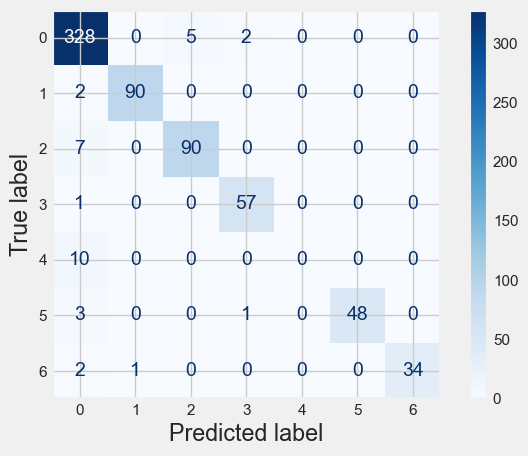

In [905]:
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)
classifier = svc.grid.fit(X_train, y_train)
disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels=[i for i in range(7)],
    cmap=plt.cm.Blues,
    # normalize='true'
)

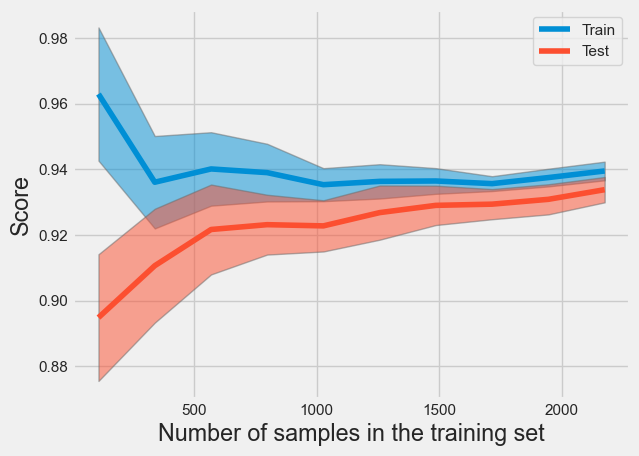

In [906]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

common_params = {
    'X': X_train,
    'y': y_train,
    'cv': ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    'train_sizes': np.linspace(0.05, 1, 10)
}

LearningCurveDisplay.from_estimator(svc.grid.best_estimator_, **common_params);

Logistic Regression

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    linear_model.LogisticRegression(max_iter=1000)
)

param_grid = {
    'logisticregression__C': np.logspace(-2, 2, 20),
    'logisticregression__penalty': ['l2']  # optional
}

grid_lr = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_lr.fit(X_train, y_train)
y_pred = grid_lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)



# # 1. Standardization
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 2. define the model and the parameters grid
# model = linear_model.LogisticRegression(max_iter=1000)
# param_grid = {
#     'C': np.logspace(-2, 2, 20),  # 注意：参数名不再需要前缀
#     'penalty': ['l2']
# }

# # 3. grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
# grid.fit(X_train_scaled, y_train)

# # 4. prediction and evaluation
# grid_prediction = grid.predict(X_test_scaled)
# print("Accuracy:", metrics.accuracy_score(y_test, grid_prediction))


0.9750367107195301

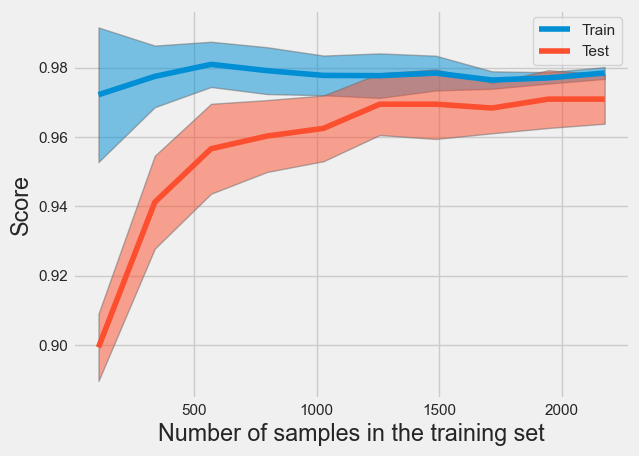

In [908]:
common_params = {
    'X': X_train,
    'y': y_train,
    'cv': ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    'train_sizes': np.linspace(0.05, 1, 10)
}

LearningCurveDisplay.from_estimator(grid_lr.best_estimator_, **common_params);

KNN

In [909]:
from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier()
# param_grid = {'n_neighbors': np.arange(1, 50)}

# grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
# grid_knn.fit(X_train, y_train)
# y_pred = grid_knn.predict(X_test)
# metrics.accuracy_score(y_test, y_pred)

knn = Class_Fit(clf=KNeighborsClassifier)
param_grid = {'n_neighbors': np.arange(1, 50)}

knn.grid_search(parameters=param_grid, Kfold=5)
knn.grid_fit(X_train, y_train)
knn.grid_predict(X_test, y_test)



0.9162995594713657


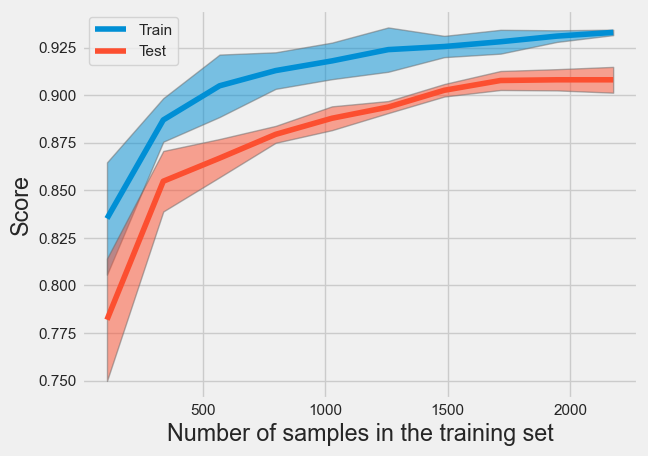

In [910]:
common_params = {
    'X': X_train,
    'y': y_train,
    'cv': ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    'train_sizes': np.linspace(0.05, 1, 10)
}

LearningCurveDisplay.from_estimator(knn.grid.best_estimator_, **common_params);

DecisionTree Classifier

In [911]:
from sklearn import tree

tr = tree.DecisionTreeClassifier()
param_grid = {'criterion' : ['entropy', 'gini'], 
              'max_features' :['sqrt', 'log2'],
              'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]
              }


grid_tr = GridSearchCV(estimator=tr, param_grid=param_grid, cv=5)
grid_tr.fit(X_train, y_train)
y_pred = grid_tr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8972099853157122

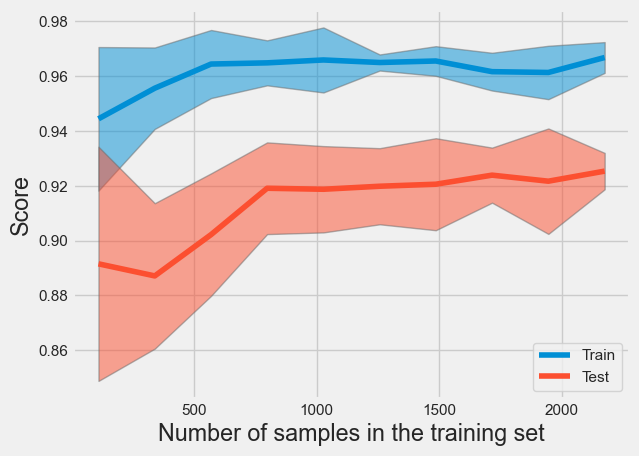

In [912]:
common_params = {
    'X': X_train,
    'y': y_train,
    'cv': ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    'train_sizes': np.linspace(0.05, 1, 10)
}

LearningCurveDisplay.from_estimator(grid_tr.best_estimator_, **common_params);

In [913]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

grid_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)
grid_gbc.fit(X_train, y_train)
grid_gbc.score(X_test, y_test)

0.9530102790014684

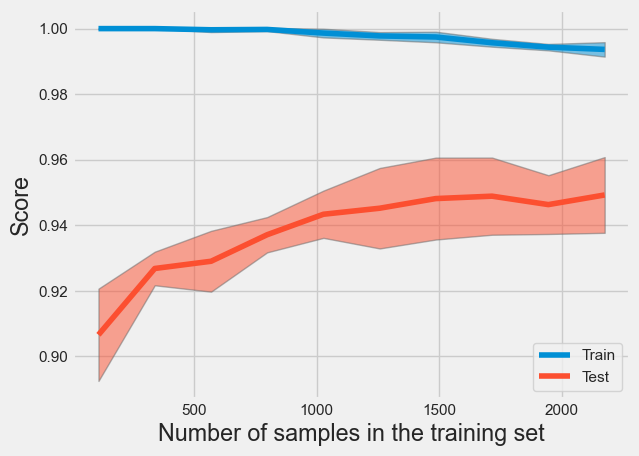

In [914]:
common_params = {
    'X': X_train,
    'y': y_train,
    'cv': ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    'train_sizes': np.linspace(0.05, 1, 10)
}

LearningCurveDisplay.from_estimator(grid_gbc.best_estimator_, **common_params);

choose the top two score classifier Logistic Regression and Gradient Boost classifier to train `a Voting Classifier` but regardless leveraging hard or soft mode, accuracy score is lower than LR or GBC itself.

In [915]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
                estimators=[
                    ('lr', grid_lr.best_estimator_),
                    ('gbc', grid_gbc.best_estimator_)
                ]
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(C=23.357214690901213,
                                                                  max_iter=1000))])),
                             ('gbc',
                              GradientBoostingClassifier(n_estimators=30))])

In [916]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.9750367107195301
gbc = 0.9530102790014684


In [917]:
voting_clf.voting='soft'
voting_clf.score(X_test, y_test)

0.9706314243759178

In [918]:
voting_clf.voting='hard'
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.9706314243759178

# 6. Testing prediction

use the prepared test set to test trained model

In [919]:
columns = ['mean', 'percent_0', 'percent_1', 'percent_2', 'percent_3', 'percent_4' ]
X = selected_customers_test[columns]
y = selected_customers_test['cluster']

scaler = StandardScaler()
X=scaler.fit_transform(X)

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(X) == -1
X = X[~outliers]
y = y[~outliers]

In [ ]:
classifiers = [(svc, 'Support Vector Machine'),
              (grid_lr, 'Logistic Regression'),
              (knn, 'k-Nearest Neighbors'),
              (grid_tr, 'Decision Tree'),
              (grid_gbc, 'Gradient Boosting')]

for clf, label in classifiers:
    if hasattr(clf, 'score'):
        print(clf.score(X, y))
    elif hasattr(clf, 'grid_predict'):
        y_pred = clf.grid_predict(X, y)
    else:
        print(f"{label} has no scoring method available")

0.9070588235294118
0.9376470588235294
0.8752941176470588
0.9188235294117647
0.92


In [920]:
voting_clf.score(X, y)

0.9294117647058824